In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
ufo = pd.read_csv('C:/Users/cathe/Documents/Python docs/UFO_sightings/UFO-Sightings-Analysis/data/full_final_UFO.csv')
kuf

In [12]:
ufo['target'] = 0.0
ufo['target'][ufo['label'] > 0] = 1.0
ufo['target'].value_counts()

C:\Users\cathe\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.0    57572
1.0     2109
Name: target, dtype: int64

In [34]:

formula = 'target ~ 0 + C(state) + C(shape) + C(date_pd) + C(phase) + C(Extreme_Weather) + Q("Proximity to USAFB")'

In [35]:
Y, X = dmatrices(formula, ufo, return_type='dataframe')
y = Y['target'].values

In [36]:
shape_v_target = pd.crosstab(ufo['shape'], ufo['target'])
shape_v_target

target,0.0,1.0
shape,,
changed,1,0
changing,1458,84
chevron,762,10
cigar,1388,20
circle,5558,208
cone,213,25
crescent,1,0
cross,176,6
cylinder,925,28


In [37]:
total_shapes = shape_v_target.apply(sum)
total_shapes

target
0.0    57572
1.0     2109
dtype: int64

In [47]:
shape_v_target /= total_shapes
shape_v_target

target,0.0,1.0
shape,,
changed,3.017014e-10,0.000000
changing,4.398807e-07,0.000019
chevron,2.298965e-07,0.000002
cigar,4.187616e-07,0.000004
circle,1.676857e-06,0.000047
cone,6.426240e-08,0.000006
crescent,3.017014e-10,0.000000
cross,5.309945e-08,0.000001
cylinder,2.790738e-07,0.000006


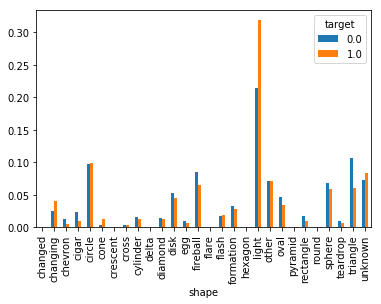

In [39]:
shape_v_target.plot(kind='bar')

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=1, stratify=y)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [68]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train,prediction_train)

0.9661528150134048


In [69]:
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.9661539492644349


In [70]:
model.intercept_

array([-3.30411495])

In [71]:
weights = Series(model.coef_[0],index=X.columns.values)
weights.sort_values()[:20] #more likely to be unexplainable in winter storm, cigar shaped, 4th of July

C(date_pd)[T.7/4/2010]     -0.977821
C(date_pd)[T.11/16/1999]   -0.942166
C(shape)[T.cigar]          -0.926681
C(date_pd)[T.7/4/2011]     -0.904200
C(shape)[T.chevron]        -0.720606
C(date_pd)[T.7/6/2013]     -0.660516
C(date_pd)[T.12/31/2013]   -0.656374
C(date_pd)[T.7/3/2011]     -0.652153
C(date_pd)[T.1/1/2014]     -0.642720
C(date_pd)[T.1/1/2012]     -0.606738
C(date_pd)[T.8/7/2012]     -0.589564
C(date_pd)[T.7/4/1997]     -0.584076
C(date_pd)[T.7/4/2012]     -0.571734
C(date_pd)[T.12/24/2013]   -0.569119
C(shape)[T.triangle]       -0.561313
C(date_pd)[T.8/21/2004]    -0.544983
C(date_pd)[T.12/31/2012]   -0.535954
C(date_pd)[T.9/14/2013]    -0.534186
C(shape)[T.egg]            -0.528380
C(date_pd)[T.10/1/2006]    -0.516600
dtype: float64

In [74]:
pd.crosstab(y_train,prediction_train, rownames=['Actual'],colnames=['Prediction'])

Prediction,0.0,1.0
Actual,,
0.0,28767,19
1.0,991,63


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98     28786
        1.0       0.73      0.07      0.12      1055

avg / total       0.96      0.97      0.95     29841

